<a href="https://colab.research.google.com/github/elienhanj/multiple_regression_linear/blob/main/Copy_of_pie_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MULTIPLE LINEAR REGRESSION**

Elien Hanjani Pramitha --
DS0108 -- Telkom DTI 2020

## **1. Intro**

Multiple linier regression atau dapat disebut analisis regresi linier ganda merupakan analisis statistik yang digunakan untuk mengetahui pengaruh beberapa variabel bebas (independent) terhadap variabel terikat (dependent).

Pada model multiple linier regression ini, konsepnya yaitu distibutor pie frozen ingin mengevaluasi berbagai faktor yang
dianggap mempengaruhi penjualan di minggu berikutnya.

Data yang digunakan yaitu data penjualan pie selama 15 minggu dengan keterangan sebagai berikut :

*   terdapat 1 veriabel terikat (Y)/dependent variable yaitu Pie_sales (setiap penjualan pie dalam 1 minggu)
*   terdapat 2 variabel bebas (X)/independent variables yaitu Price (dollar) dan Advertising ($100’s)

Karena pada data penjualan pie ini terdapat 2 independent variables maka inilah mengapa data ini dapat diolah dengan multiple linear regression. Dimana variabel pie_sales akan dipengaruhi dengan perubahan pada variabel price dan advertising, bisa saja ketika pada minggu pertama biaya advertising lebih besar dan harga jual tinggi, karena lebih banyak konsumen yang tertarik membeli jadi pie yang terjual juga banyak, begitupun sebaliknya. Model ini akan melakukan prediksi penjualan untuk 1 minggu dimana harga jual (price) sebesar 5.50 dollar dan biaya periklanan (advertising) sebesar 350 dollar.



## **2. Preparing Data**

Langkah pertama untuk mempermudah dalam membuat model sebaiknya yaitu menyiapkan semua library yang dibutuhkan. Pada model ini menggunakan library


*   Pandas untuk memanggil dan menampilkan dataset berbentuk csv.
*   Statsmodels untuk melakukan detail analisis.
*   Linear_model dari sklearn untuk membangun model multiple linear regression.





In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model

Langkah kedua yaitu mengimport dataset pie-sales.csv yang sudah disediakan dari github. Karena file dataset tersebut berupa csv dan setiap row dipisahkan dengan ";" maka gunakan separator untuk menghindari missing import data.

In [ ]:
# Import Dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df_pie

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


## **3. Multiple Linear Regression Using Sklearn**

Agar dataset penjualan pie dapat diproses pada library sklearn, langkah pertama yaitu membuat variable dengan melakukan inisialisasi variable independent (X) dan variable dependent (Y). Dimana variable X yaitu price dan advertising, variable Y yaitu pie_sales.

In [ ]:
X=df_pie[['price','advertising']]
Y=df_pie['pie_sales']

Kedua variable tersebut sudah berhasil dibuat. Sekarang, saatnya melakukan pemodelan dataset penjualan pie menggunakan multiple linear regression.

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Sekarang, mari mencari titik potong (b0) dan koefisien (b1, b2,… bn).

Catatan: Intercept hanya satu, tetapi koefisien bergantung pada jumlah variabel independen. Karena kita memiliki 2 variabel independen, kita akan memiliki 2 koefisien.

In [ ]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


Jadi, output dari intercept, ini menunjukkan 306.5261932837436. Intercept ini merupakan perpotongan dengan sumbu Y, yaitu jika X bernilai 0. Demikian pula, output dari koefisien ditampilkan dalam bentuk array.

Sehingga dapat diketahui rumus regression linier untuk data ini yaitu :

**Sales = Intercept(b0) + coefficients(b1) * Price + coefficients(b2) * Advertising**

Saatnya melakukan prediksi penjualan untuk 1 minggu dimana harga jual (price) sebesar 5.50 dollar dan biaya periklanan (advertising) sebesar 350 dollar.

**Sales = 306.5261932837436 - 24.97508952 * 5.50 + 74.13095749 * 3.5**

In [ ]:
# prediction with sklearn
new_price = 5.50
new_advertising = 3.5
print ('Predicted  Pie Sales: \n', regr.predict([[new_price,new_advertising]]))

Predicted  Pie Sales: 
 [428.62155215]


Jadi, hasil prediksi penjualan untuk 1 minggu dimana harga jual (price) sebesar 5.50 dollar dan biaya periklanan (advertising) sebesar 350 dollar sebesar 428.62155215.

**Sampai disini, model multiple linear regression untuk data penjualan pie sudah selesai dibuat.**

## **4. Multiple Linear Regression Using Statsmodels**

Jika ingin lebih detail, kita bisa melakukan analisis multiple linear regresion dengan statsmodels. Statsmodels adalah modul python yang menyediakan kelas dan fungsi untuk estimasi model statistik yang berbeda, serta uji statistik yang berbeda.

Pertama, tambahkan nilai constant dalam model :

In [ ]:
X = sm.add_constant(X) # adding a constant

In [ ]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Sat, 17 Oct 2020   Prob (F-statistic):             0.0120
Time:                        15:05:22   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

Dari data tersebut, dapat diketahui nilai koefisien dan intersep yang kita temukan sebelumnya menggunakan sklearn sama dengan keluaran dari statsmodels.

Dengan menggunakan statsmodel ini, selain dapat melihat nilai koefisien dan intersep, kita juga dapat melihat nilai dari :

*   R-squared = coefficient of determination adalah porsi variasi total
di dependent variable yang dijelaskan oleh variasi dalam
independent variable. Coefficient of determination bisa disebut sebagai R-squared yang dilambangkan dengan r2. Untuk melakukan perhitungan r2, dilakukan dengan menggunakan rumus : 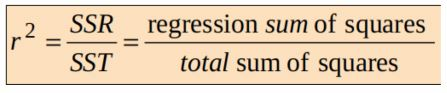
Didalam pemodelan ini, nilai r2 diperoleh sebesar 0.521. Dimana 0 < r2 < 1 nilai r2 model penjualan pie ini termasuk Weaker linear relationships
antara X dan Y.
*   T test = T test dihitung dengan menggunakan rumus :  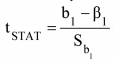 Dimana b1 adalah nilai coef, Sb1 nilai std err.
*   P>|t| = nilai p-value memiliki arti bahwa ada cukup bukti bahwa price dan advirtising mempengaruhi pie_sales.
*   F-statistic = dapat diperoleh menggunakan rumus : 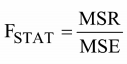






Dari semua langkah-langkah diatas, model penjualan pie dengan menggunakan sklearn dan statsmodel berhasil dibuat.

Referensi :

*   https://github.com/rc-dbe/dti
*   Modul 4: Regression by
Dr. Nurvita Trianasari, S.Si, M.Stat.

